Import Libraries and Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

####import sys
####sys.path.append("../")

from package_module.functions import DataAnalyzer

In [2]:
class_instance = DataAnalyzer(pd.read_csv("../assets_data/wine_quality_data.csv"))
df_wine = class_instance.df

df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Exploratory Data Analysis

In [3]:
##Basic (preliminary) information about the dataframe
print(df_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [4]:
##Statistical Information
print(df_wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [5]:
##Quantity of samples for each color
print(df_wine['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


In [6]:
##Check the balance of the information
print("Percentage of samples of each color [%]\n", round(df_wine['color'].value_counts()/df_wine.shape[0]*100,2))

Percentage of samples of each color [%]
 color
white    75.39
red      24.61
Name: count, dtype: float64


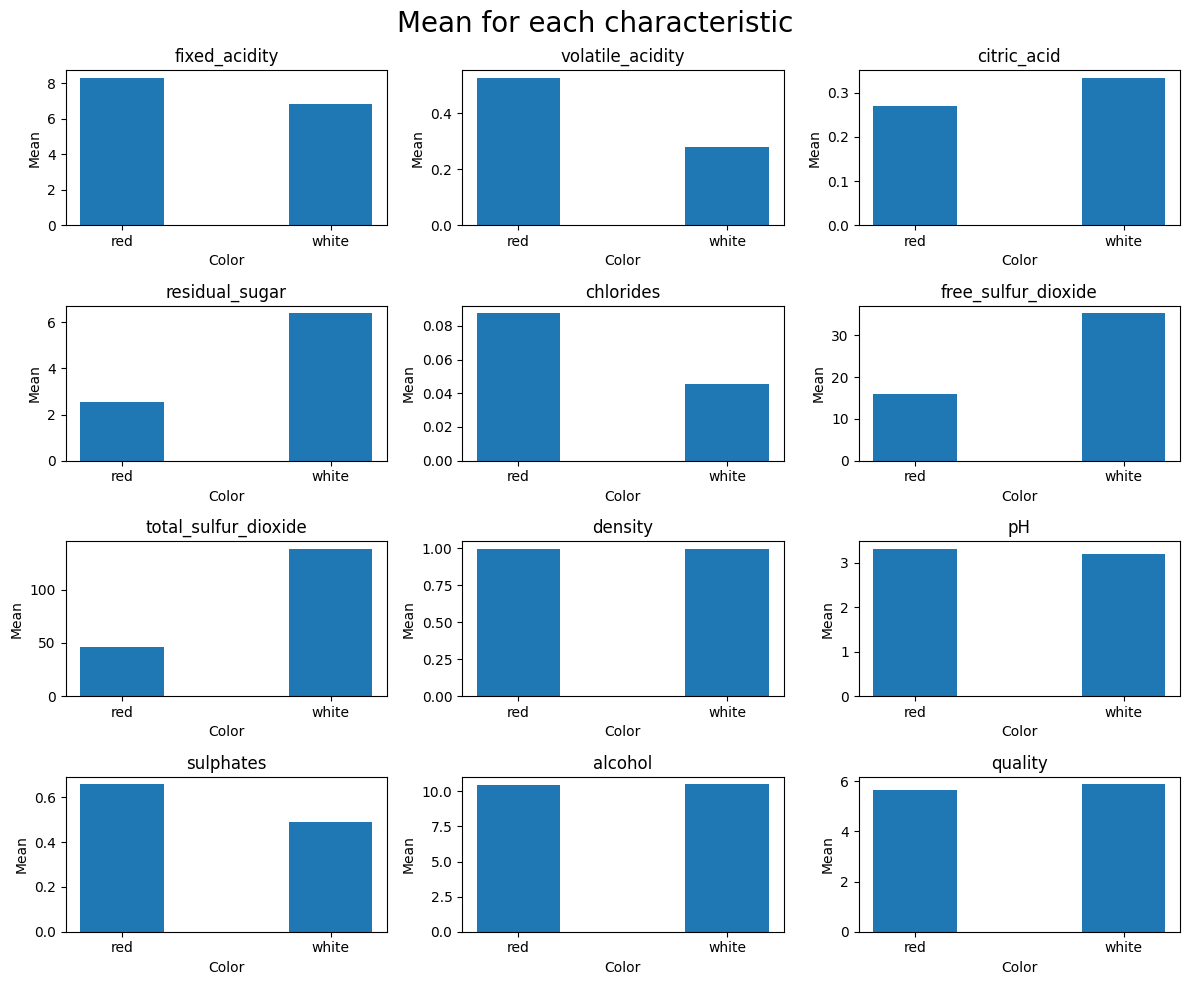

In [7]:
##Mean for each characteristic (show the tendency)
grouped_df = df_wine.groupby("color").mean()

fig, axes = plt.subplots(4, 3, figsize=(12, 10))
fig.suptitle('Mean for each characteristic', fontsize=20)

# Iterar sobre las columnas y crear los gráficos de barras
i = 0
for column in grouped_df.columns:
    row = i // 3
    col = i % 3

    # Obtener los datos de la columna actual
    data = grouped_df[column]

    # Crear el gráfico de barras en el subplot correspondiente
    axes[row, col].bar(data.index, data, width=0.4)

    # Configurar los títulos y etiquetas
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel("Color")
    axes[row, col].set_ylabel("Mean")

    i += 1


plt.tight_layout()
plt.savefig("../src/static/images/bar_mean_wine.jpg")
plt.show()

Data Visualization using DataAnalyzer

<Figure size 640x480 with 0 Axes>

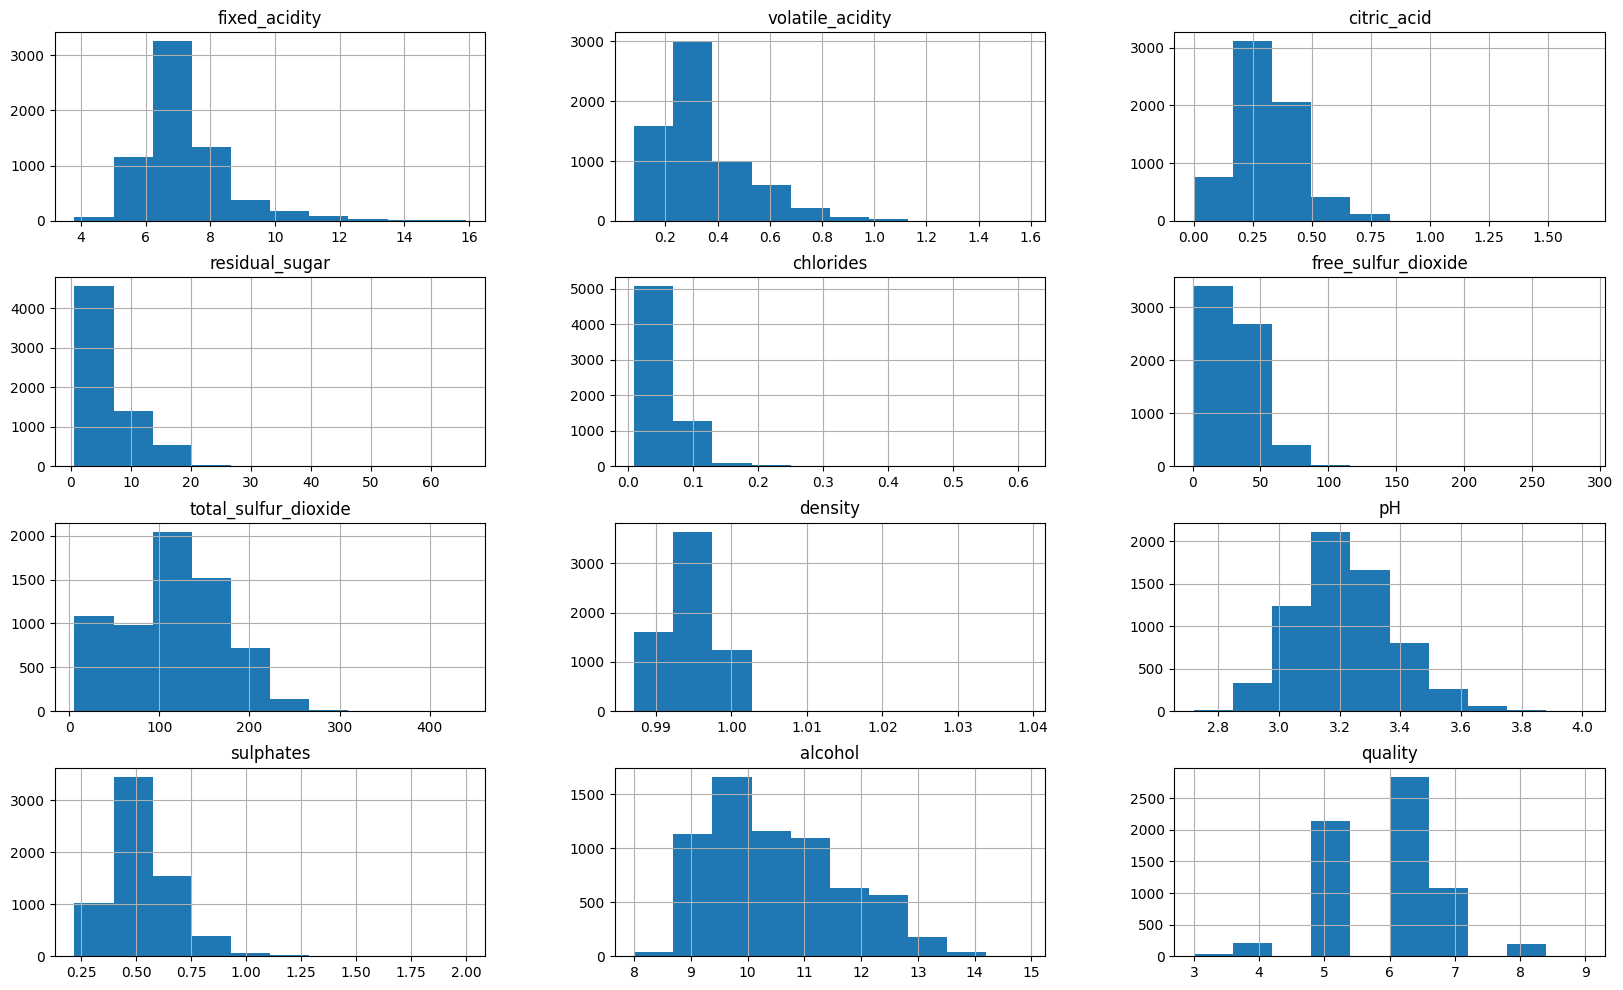

In [8]:
class_instance.histogram("/home/juliancoss/repos_git/data-analysis_bi-project/src/static/images/hist_wine.jpg")